# Entropy and MPSlib
The self-information, and entropy (the average self-information), acan be commputed using MPSlib by setting

    do_entropy=1

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import mpslib as mps


### Setup MPSLib
Setup MPSlib, and select to compute entropy using for example

In [33]:
# Initialize MPSlib using the mps_snesim_tree algorthm, and a simulation grid of size [80,70,1]
O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=[80,70,1])
O.par['n_real'] = 40
O.par['n_cond']=9
# Choose to compute entropy
O.par['do_entropy']=1
TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
O.TI = TI

O.run()
O.H

/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib
Using mps_snesim_tree installed in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin (scikit-mps in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)
mpslib: trying to run 'mps_snesim_tree' on 'mps.txt' in folder '/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin/mps_snesim_tree'
mpslib: 'mps_snesim_tree' ran in   32.57s 
loading entropy from ti.dat_ent_0.gslib


584.4045

## Plot entropy

Text(0.5, 1.0, 'Entropy = 6e+02')

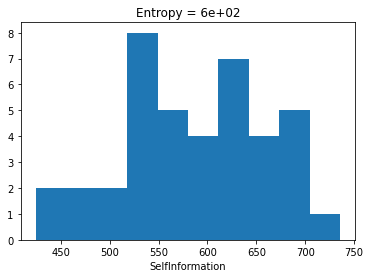

In [37]:
plt.hist(O.SI)
plt.xlabel('SelfInformation')
plt.title('Entropy = %3.1g' % (O.H))

### Entropy as a function of number of conditional data

In [108]:
TI, TI_filename = mps.trainingimages.strebelle(di=4, coarse3d=1)

n_cond_arr = np.arange(10)+1
H=np.zeros(n_cond_arr.size) # entropy
t=np.zeros(n_cond_arr.size) # simulation time
i=0                      
SI=[]
for n_cond in n_cond_arr:
    O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=[80,70,1])
    O.par['n_real'] = 10
    O.par['n_cond']=n_cond
    # Choose to compute entropy
    O.par['do_entropy']=1
    O.TI = TI;
    
    #O.run_parallel()
    O.run()
    print('n_cond = %d, H=%4.1f' % (n_cond,O.H))
    SI.append(O.SI) # Self-information
    H[i]=O.H # Entropy
    t[i]=O.time
    i=i+1


/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib
Using mps_snesim_tree installed in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin (scikit-mps in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)
mpslib: trying to run 'mps_snesim_tree' on 'mps.txt' in folder '/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin/mps_snesim_tree'
mpslib: 'mps_snesim_tree' ran in    4.54s 
loading entropy from ti.dat_ent_0.gslib
n_cond = 1, H=1455.6
/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib
Using mps_snesim_tree installed in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin (scikit-mps in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)
mpslib: trying to run 'mps_snesim_tree' on 'mps.txt' in folder '/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin/mps_snesim_tree'
mpslib: 'mps_snesim_tree' ran in    5.45s 
loading entropy from ti.dat_ent_0.gslib
n_cond = 2, H=1140.6
/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib
Using mps_snesim_tree installed in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin (scikit-mps i

Text(0, 0.5, 'simulation time')

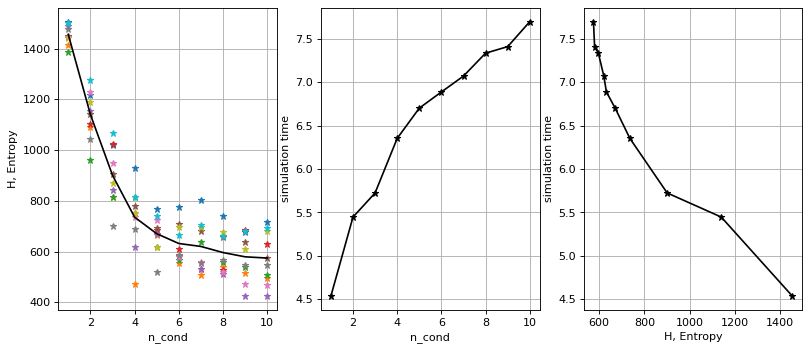

In [109]:
plt.figure(figsize=(12, 5), dpi=80)

ax1 = plt.subplot(1, 3, 1)
plt.plot(n_cond_arr,SI,'*')
plt.plot(n_cond_arr,H,'k-')
plt.grid()
plt.xlabel('n_cond')
plt.ylabel('H, Entropy')

ax2 = plt.subplot(1, 3, 2)
plt.plot(n_cond_arr,t,'k-*')
plt.grid()
plt.xlabel('n_cond')
plt.ylabel('simulation time')

ax3 = plt.subplot(1, 3, 3)
plt.plot(H,t,'k-*')
plt.grid()
plt.xlabel('H, Entropy')
plt.ylabel('simulation time')
